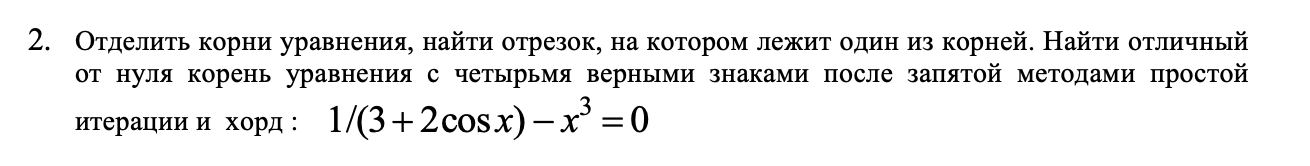

In [37]:
import plotly.express as px
import numpy as np
import math
import sympy

def f(x):
  return (1/(3+2*np.cos(x))-x**3)

x = np.arange(-2.0, 2.0, 0.001)

fig = px.scatter(x=x, y=f(x))


fig = px.scatter(x=x, y=f(x))
fig.update_xaxes(range = [x[0], x[-1]], zeroline=True, zerolinewidth=5, zerolinecolor='Green')
fig.update_yaxes(range=[-10.0, 10.0], zeroline=True, zerolinewidth=5, zerolinecolor='Green')

fig.show()

Метод Ньютона и МПИ

In [38]:
#Задаем функцию, производную, края отрезка, точность
x = sympy.Symbol('x')
f = (1/(3+2*sympy.cos(x))-x**3)
fdiff = f.diff(x)
a = 0.1
b = 2
e = 0.0001

#Функции, возвращающие значения в точке
def F(z):
    return f.evalf(subs={x: z})
 
def diffF(z):
    return fdiff.evalf(subs={x: z})

def g(z):
    return ((1/(3+2*sympy.cos(x))**(1/3))).evalf(subs={x: z})
 
def SecantMethod(a, b, eps):
        x = a
        x_0 = b
        x_prev = b
        i = 0
        while (abs(x-x_prev) > eps):
          x_prev = x
          x = x - (F(x) * (x-x_0) / (F(x)-F(x_0)))
          i+=1
        return x, i

def NewthonMethod(a,b):
    x_0 = (a+b) / 2
    x_n = F(x_0)
    x_n1 = x_n - F(x_n) / diffF(x_n)
    n = 0
    while abs(x_n1 - x_n) > e:
      n += 1
      x_n = x_n1
      x_n1 = x_n-F(x_n)/  diffF(x_n)
    return x_n1, n

def SIM(z):
    guess = z
    guess_new = g(guess)
    n = 0               
    for iteration in range(1,100): 
      n += 1
      if abs(guess_new - guess) < 0.0000001:
          break
      guess = guess_new   
      guess_new = g(guess)
    return guess_new, n       

simResult = SIM(1.0)
newthonResult = NewthonMethod(a, b)
secantMethodResult = SecantMethod(a, b, 0.0001)
print(f"МПИ\nКорень: {simResult[0]}, количество итераций: {simResult[1]}\n")
print(f"Метод хорд\nКорень: {secantMethodResult[0]}, количество итераций: {secantMethodResult[1]}\n")
print(f"Метод Ньютона\nКорень: {newthonResult[0]}, количество итераций: {newthonResult[1]}\n")

МПИ
Корень: 0.599047604374993, количество итераций: 7

Метод хорд
Корень: 0.598646921915666, количество итераций: 38

Метод Ньютона
Корень: 0.599047604022235, количество итераций: 11

